# 1. 构造非线性数据

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
x = np.random.uniform(-4,2,size=(100))
y = 2*x**2 + 4*x + 3 + np.random.randn(100)

X = x.reshape(-1,1)

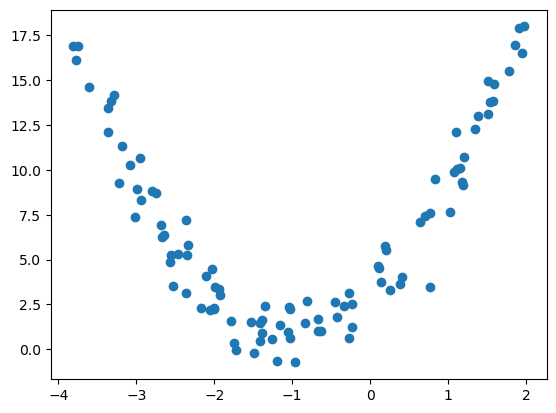

In [95]:
plt.scatter(x,y)
plt.show()

# 2. 线性回归

In [96]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression()

In [97]:
y_predict = linear_regression.predict(X)

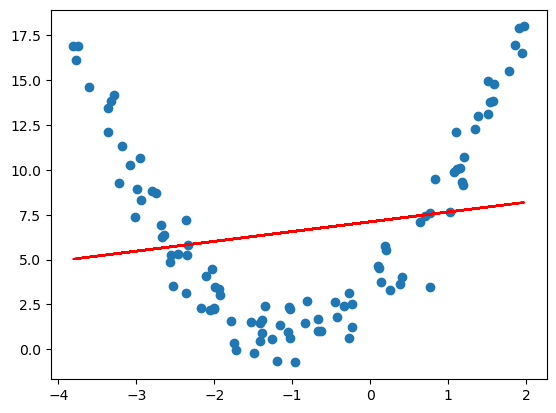

In [98]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.show()

# 3. 多项式回归


In [99]:
X[:5]

array([[-2.80197751],
       [-1.93837712],
       [ 0.11916264],
       [-1.41600012],
       [-2.0571341 ]])

In [100]:
# y = 2*x**2 + 4*x + 3
# 这里使用变量替换 x1=x ,x2=x**2, 替换为多元线程回归方程
X_new = np.hstack([X,X**2])

In [101]:
X_new[:5]

array([[-2.80197751,  7.85107796],
       [-1.93837712,  3.75730586],
       [ 0.11916264,  0.01419974],
       [-1.41600012,  2.00505633],
       [-2.0571341 ,  4.23180072]])

In [102]:
linear_regression_new = LinearRegression()
linear_regression_new.fit(X_new,y)

LinearRegression()

In [103]:
y_predict_new = linear_regression_new.predict(X_new)

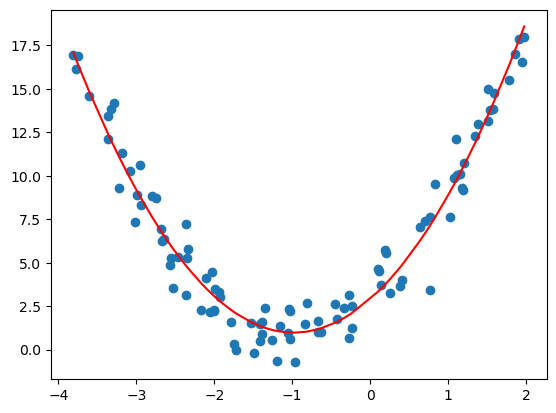

In [104]:
plt.scatter(x,y)
# 这里x是无序的, 需要排序,否则绘制的图形会乱跳
plt.plot(np.sort(x),y_predict_new[np.argsort(x)],color="red")
plt.show()

In [105]:
# y = 2*x**2 + 4*x + 3 就是截距3,预测还是很接近的
linear_regression_new.intercept_

np.float64(2.917057151827144)

In [106]:
# x1和x2的系数
linear_regression_new.coef_

array([3.94897403, 2.01352063])

## scikit-learn中的PolynomialFeatures做数据转换

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
# 创建一个多项式特征生成器，degree=2 表示生成最高为2次幂的多项式特征（包括常数项）
polynomial_features = PolynomialFeatures(degree=2)

# 使用多项式特征生成器对原始特征X进行变换，生成多项式特征矩阵
# 变换后每一行包含 [1, x, x^2]，即常数项、一次项和二次项
X_poly = polynomial_features.fit_transform(X)

In [109]:
X_poly[:5]

array([[ 1.        , -2.80197751,  7.85107796],
       [ 1.        , -1.93837712,  3.75730586],
       [ 1.        ,  0.11916264,  0.01419974],
       [ 1.        , -1.41600012,  2.00505633],
       [ 1.        , -2.0571341 ,  4.23180072]])